In [8]:
%reload_ext autoreload
%autoreload 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import allison
from allison.clustering import Kmeans

In [10]:
device = 'gpu' if allison.cuda.is_available() else 'cpu'
device

✅ GPU basic operation passed
✅ GPU available: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA runtime version: 13000
CuPy version: 13.6.0


'gpu'

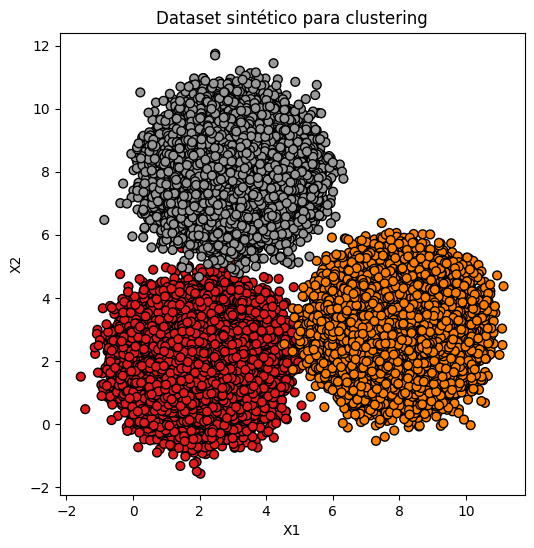

In [11]:
# Semilla para reproducibilidad
np.random.seed(42)

# Parámetros
n_clusters = 3
samples_per_cluster = 100000

# Centros de los clústeres (puedes cambiarlos)
centros = np.array([
    [2, 2],
    [8, 3],
    [3, 8]
])

# Desviación estándar de los clústeres
std = 0.8

# Genera los puntos
X = []
y = []
for label, centro in enumerate(centros):
    puntos = np.random.randn(samples_per_cluster, 2) * std + centro
    X.append(puntos)
    y.append(np.full(samples_per_cluster, label))

# Unimos todos los puntos y etiquetas
X = np.vstack(X)
y = np.concatenate(y)

# Visualización rápida
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Set1", s=40, edgecolor='k')
plt.title("Dataset sintético para clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [12]:
X_train = allison.tensor(X, device='gpu')
X_train

Tensor(
[[2.39737132 1.88938856]
 [2.51815083 3.21842389]
 [1.8126773  1.81269043]
 ...
 [2.22349523 8.08851348]
 [2.37267877 7.88042139]
 [2.92900066 7.96982888]], shape=(300000, 2), device=gpu, requires_grad=False)

In [13]:
kmeans = Kmeans(n_clusters=n_clusters)
kmeans.fit(X_train)

In [14]:
kmeans.centroids

array([[2.99639996, 7.99675254],
       [2.00461449, 1.99694749],
       [7.99884649, 2.99995787]])